<a href="https://colab.research.google.com/github/Rafiryd/Rafiryd/blob/rafiryd/skripsi19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/

!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google_play_scraper import app

import pandas as pd

import numpy as np

import seaborn as sns

In [5]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 1000 )

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.bukalapak.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=1300, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

Problems slovlig tools = mencari akar permasalahan pada suatu masalah

5 why

metode mencari problems sloving dengan cara menanyakan apa penyebab permasalahaan muncul dan mencari jawabannya. hal ini di lakUkan berkali klai sampai permasalahan dapat tergambar dengan jelas

action priority 

diagram yang dapat di gunakan untuk mencari prioritas masalah berdasarkan impact atas benefit yang bisa diberikan dengan diagram ini kita memilih masalah yang impactnya mayoritas dari permasalahan yang ada.

fishbone digram 

digram yang dapat di gunakan untuk merinci masalah dan membantu mencari akar masalah yang dapat dilihat dari beberapa point of view

flowchart/algo

metode pemecahan masalah dengan cara memetakan flow atau membuat pseudo algoritma yang untuk menentukan masalah dan cara untuk mencari solusinya secara sistematis

In [6]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f2e26548-83d2-4bcf-bac3-6dc9db1cb12d,Nizar Rayyan,https://play-lh.googleusercontent.com/a-/ACB-R...,Paylater ngk bener.. selalu di batalkan otomat...,1,85,5.31.3,2023-04-16 23:03:31,"Hai, mohon maaf atas ketidaknyamanannya. Jika ...",2020-03-06 11:44:30,5.31.3
1,9d6aac3b-63cf-4144-9b4e-c94d291d808a,dedy kelana (CV PRIBUMI BANGKIT),https://play-lh.googleusercontent.com/a/AGNmyx...,pastinya bukan hp dan wifi saya yang lemmooott...,1,154,5.30.2,2023-03-25 10:26:56,None,NaT,5.30.2
2,69ef4cd3-e71e-4383-9f34-d9e3fc959987,Rika Riyanti,https://play-lh.googleusercontent.com/a/AGNmyx...,"Sangat membantu sekali bukalapak, tapi sudah s...",5,60,5.31.3,2023-04-11 13:30:31,None,NaT,5.31.3
3,cc641f6a-2765-4d72-9d47-24594dc4f32a,Afifur Rohman,https://play-lh.googleusercontent.com/a-/ACB-R...,Sebenarnya aplikasi ini cukup bagus. Cuma ada ...,1,4,5.31.3,2023-04-26 08:16:00,None,NaT,5.31.3
4,8b78cd2a-ec29-442d-b42c-d9d3a2a841c0,Yuni Artha,https://play-lh.googleusercontent.com/a/AGNmyx...,"BUKALAPAK semakin parah.. Pesanan tgl 5 April,...",1,29,5.31.3,2023-04-13 19:30:16,None,NaT,5.31.3


In [7]:
len(df_busu.index) #count the number of data we got

1300

In [8]:
df_busu[['userName', 'score','at', 'content']].tail()  #preview userName, rating, date-time, and reviews only

,userName,score,at,content
1295,Pengguna Google,1,2019-05-12 10:33:31,Satu dulu ya bintangnya nanti kalo sdh normal ...
1296,Rinto Martadi,1,2023-02-02 10:16:53,Berhenti lah belanja di Bukalapak..... Makin b...
1297,nursito gendut,5,2022-12-08 13:00:45,saya sdh dari dulu pakai aplikasi buka lapak d...
1298,agus rianto,5,2023-04-14 02:13:14,Sangat mudah bertransaksi
1299,Pengguna Google,5,2020-04-23 01:55:46,Bagus aplikasi menguntungkan hampir semua bara...


In [9]:
name_dataframe = df_busu.loc[:,["userName", "score", "at", "content"]]
name_dataframe.rename(columns={"userName": "Nama pengguna", "score":"Rating", "at": "Date", "content": "Ulasan"}, inplace=True)

In [10]:
name_dataframe.tail()

,Nama pengguna,Rating,Date,Ulasan
1295,Pengguna Google,1,2019-05-12 10:33:31,Satu dulu ya bintangnya nanti kalo sdh normal ...
1296,Rinto Martadi,1,2023-02-02 10:16:53,Berhenti lah belanja di Bukalapak..... Makin b...
1297,nursito gendut,5,2022-12-08 13:00:45,saya sdh dari dulu pakai aplikasi buka lapak d...
1298,agus rianto,5,2023-04-14 02:13:14,Sangat mudah bertransaksi
1299,Pengguna Google,5,2020-04-23 01:55:46,Bagus aplikasi menguntungkan hampir semua bara...


In [11]:
name_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Nama pengguna  1300 non-null   object        
 1   Rating         1300 non-null   int64         
 2   Date           1300 non-null   datetime64[ns]
 3   Ulasan         1300 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 40.8+ KB


In [12]:
import nltk

In [13]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [14]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].astype(str)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan
0,Nizar Rayyan,1,2023-04-16 23:03:31,Paylater ngk bener.. selalu di batalkan otomat...
1,dedy kelana (CV PRIBUMI BANGKIT),1,2023-03-25 10:26:56,pastinya bukan hp dan wifi saya yang lemmooott...
2,Rika Riyanti,5,2023-04-11 13:30:31,"Sangat membantu sekali bukalapak, tapi sudah s..."
3,Afifur Rohman,1,2023-04-26 08:16:00,Sebenarnya aplikasi ini cukup bagus. Cuma ada ...
4,Yuni Artha,1,2023-04-13 19:30:16,"BUKALAPAK semakin parah.. Pesanan tgl 5 April,..."


In [15]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].str.lower()

In [16]:
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")
                
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_links)

In [17]:
#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_number)

In [18]:
#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_punctuation)

In [19]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_singl_char)

In [20]:
# Tokenisasi 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

name_dataframe['Ulasan_tokenize'] = name_dataframe['Ulasan'].apply(word_tokenize_wrapper)

In [21]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o..."
1,dedy kelana (CV PRIBUMI BANGKIT),1,2023-03-25 10:26:56,pastinya bukan hp dan wifi saya yang lemmooott...,"[pastinya, bukan, hp, dan, wifi, saya, yang, l..."
2,Rika Riyanti,5,2023-04-11 13:30:31,sangat membantu sekali bukalapak tapi sudah sa...,"[sangat, membantu, sekali, bukalapak, tapi, su..."
3,Afifur Rohman,1,2023-04-26 08:16:00,sebenarnya aplikasi ini cukup bagus cuma ada b...,"[sebenarnya, aplikasi, ini, cukup, bagus, cuma..."
4,Yuni Artha,1,2023-04-13 19:30:16,bukalapak semakin parah pesanan tgl april di...,"[bukalapak, semakin, parah, pesanan, tgl, apri..."
...,...,...,...,...,...
1295,Pengguna Google,1,2019-05-12 10:33:31,satu dulu ya bintangnya nanti kalo sdh normal ...,"[satu, dulu, ya, bintangnya, nanti, kalo, sdh,..."
1296,Rinto Martadi,1,2023-02-02 10:16:53,berhenti lah belanja di bukalapak makin banyak...,"[berhenti, lah, belanja, di, bukalapak, makin,..."
1297,nursito gendut,5,2022-12-08 13:00:45,saya sdh dari dulu pakai aplikasi buka lapak d...,"[saya, sdh, dari, dulu, pakai, aplikasi, buka,..."
1298,agus rianto,5,2023-04-14 02:13:14,sangat mudah bertransaksi,"[sangat, mudah, bertransaksi]"


In [22]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize'], dtype='object')

In [23]:
#Run This Code to Sort the Data By Date 
# tanggal 26-04-2022 sampai 12-10-2022

new_df = name_dataframe[['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize']]
sorted_df = new_df.sort_values(by='Date', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
255,I LOVE MUKBANG,5,2023-04-28 13:08:04,belanja di buka lapak puas mudah dan cepat no ...,"[belanja, di, buka, lapak, puas, mudah, dan, c..."
10,Kaliri Alwariji,4,2023-04-28 13:05:41,sekarang banyak iklannya jadi loadingnya lama ...,"[sekarang, banyak, iklannya, jadi, loadingnya,..."
39,Sudrajat,2,2023-04-28 11:39:46,tolong dong begitu barang sudah di terima sama...,"[tolong, dong, begitu, barang, sudah, di, teri..."
912,Supri Anto,5,2023-04-28 09:59:47,tolong dong kasih jatuh temponya bulan dan b...,"[tolong, dong, kasih, jatuh, temponya, bulan, ..."
102,Iqbal Khoir,4,2023-04-28 07:13:47,terimakasih bukalapak sudah menindaklanjuti ke...,"[terimakasih, bukalapak, sudah, menindaklanjut..."


In [24]:
sorted_df.dtypes

Nama pengguna              object
Rating                      int64
Date               datetime64[ns]
Ulasan                     object
Ulasan_tokenize            object
dtype: object

In [25]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

Ulasan_fqsist = name_dataframe['Ulasan_tokenize'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(Ulasan_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(tidak, 4), (di, 3), (nya, 3), (kadang, 2), (...
1    [(dan, 3), (saya, 3), (mau, 3), (yang, 2), (se...
2    [(sangat, 2), (sekali, 2), (bukalapak, 2), (ta...
3    [(sebenarnya, 1), (aplikasi, 1), (ini, 1), (cu...
4    [(april, 3), (di, 3), (dengan, 3), (bukalapak,...
Name: Ulasan_tokenize, dtype: object


In [26]:
name_dataframe['Ulasan_tokenize'].unique

<bound method Series.unique of 0       [paylater, ngk, bener, selalu, di, batalkan, o...
1       [pastinya, bukan, hp, dan, wifi, saya, yang, l...
2       [sangat, membantu, sekali, bukalapak, tapi, su...
3       [sebenarnya, aplikasi, ini, cukup, bagus, cuma...
4       [bukalapak, semakin, parah, pesanan, tgl, apri...
                              ...                        
1295    [satu, dulu, ya, bintangnya, nanti, kalo, sdh,...
1296    [berhenti, lah, belanja, di, bukalapak, makin,...
1297    [saya, sdh, dari, dulu, pakai, aplikasi, buka,...
1298                        [sangat, mudah, bertransaksi]
1299    [bagus, aplikasi, menguntungkan, hampir, semua...
Name: Ulasan_tokenize, Length: 1300, dtype: object>

In [27]:
slank_word_dict = {
    "berjalansudah" : "berjalan",
    "paraah" : "parah",
    "keduakali" : "",
    "keduakali" : "kedua kali",
    "agak" : "sedikit",
    "pas" : "saat",
    "produkx" : "produknya",
    "sukamkasih" : "suka makasih",
    "gak" : "tidak",
    "cpt" : "cepat",
    "sdh" : "sudah",
    "recommend" : "rekomendasi",
    "bagusseller" : "bagus",
    "bagusssss" : "bagus",
    "bagussssss" : "bagus",
    "baguuussss" : "bagus",
    "cepatmakasih": "cepat",
    "cepatmantappp": "cepat",
    "cepatproduct": "cepat",
    "cepatrecomended": "cepat",
    "cepattoko": "cepat",
    "recomended": "rekomendasi",
    "recommended": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomended": "rekomendasi",
    }

def slank_normalized_term(document):
    return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

In [30]:
normalizad_word = pd.read_csv("/content/kamusindonesia.csv.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [31]:
name_dataframe['Ulasan_normalized'] = name_dataframe['Ulasan_tokenize'].apply(normalized_term).apply(slank_normalized_term)

In [32]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan..."
1,dedy kelana (CV PRIBUMI BANGKIT),1,2023-03-25 10:26:56,pastinya bukan hp dan wifi saya yang lemmooott...,"[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, bukan, hp, dan, wifi, saya, yang, l..."
2,Rika Riyanti,5,2023-04-11 13:30:31,sangat membantu sekali bukalapak tapi sudah sa...,"[sangat, membantu, sekali, bukalapak, tapi, su...","[sangat, membantu, sekali, bukalapak, tapi, su..."
3,Afifur Rohman,1,2023-04-26 08:16:00,sebenarnya aplikasi ini cukup bagus cuma ada b...,"[sebenarnya, aplikasi, ini, cukup, bagus, cuma...","[sebenarnya, aplikasi, ini, cukup, bagus, cuma..."
4,Yuni Artha,1,2023-04-13 19:30:16,bukalapak semakin parah pesanan tgl april di...,"[bukalapak, semakin, parah, pesanan, tgl, apri...","[bukalapak, semakin, parah, pesanan, tanggal, ..."
...,...,...,...,...,...,...
1295,Pengguna Google,1,2019-05-12 10:33:31,satu dulu ya bintangnya nanti kalo sdh normal ...,"[satu, dulu, ya, bintangnya, nanti, kalo, sdh,...","[satu, dulu, ya, bintangnya, nanti, kalo, suda..."
1296,Rinto Martadi,1,2023-02-02 10:16:53,berhenti lah belanja di bukalapak makin banyak...,"[berhenti, lah, belanja, di, bukalapak, makin,...","[berhenti, lah, belanja, di, bukalapak, makin,..."
1297,nursito gendut,5,2022-12-08 13:00:45,saya sdh dari dulu pakai aplikasi buka lapak d...,"[saya, sdh, dari, dulu, pakai, aplikasi, buka,...","[saya, sudah, dari, dulu, pakai, aplikasi, buk..."
1298,agus rianto,5,2023-04-14 02:13:14,sangat mudah bertransaksi,"[sangat, mudah, bertransaksi]","[sangat, mudah, bertransaksi]"


In [33]:
name_dataframe['Ulasan_normalized'].unique

<bound method Series.unique of 0       [paylater, enggak, benar, selalu, di, batalkan...
1       [pastinya, bukan, hp, dan, wifi, saya, yang, l...
2       [sangat, membantu, sekali, bukalapak, tapi, su...
3       [sebenarnya, aplikasi, ini, cukup, bagus, cuma...
4       [bukalapak, semakin, parah, pesanan, tanggal, ...
                              ...                        
1295    [satu, dulu, ya, bintangnya, nanti, kalo, suda...
1296    [berhenti, lah, belanja, di, bukalapak, makin,...
1297    [saya, sudah, dari, dulu, pakai, aplikasi, buk...
1298                        [sangat, mudah, bertransaksi]
1299    [bagus, aplikasi, menguntungkan, hampir, semua...
Name: Ulasan_normalized, Length: 1300, dtype: object>

In [34]:
from nltk.corpus import stopwords

In [35]:
list_stopwords = stopwords.words('indonesian')

In [36]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

name_dataframe['Ulasan_stop_removed'] = name_dataframe['Ulasan_normalized'].apply(stopwords_removal) 

In [37]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga..."
1,dedy kelana (CV PRIBUMI BANGKIT),1,2023-03-25 10:26:56,pastinya bukan hp dan wifi saya yang lemmooott...,"[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, hp, wifi, lemmooottttt, dasarnya, b..."
2,Rika Riyanti,5,2023-04-11 13:30:31,sangat membantu sekali bukalapak tapi sudah sa...,"[sangat, membantu, sekali, bukalapak, tapi, su...","[sangat, membantu, sekali, bukalapak, tapi, su...","[membantu, bukalapak, pelanggan, paylater, pem..."
3,Afifur Rohman,1,2023-04-26 08:16:00,sebenarnya aplikasi ini cukup bagus cuma ada b...,"[sebenarnya, aplikasi, ini, cukup, bagus, cuma...","[sebenarnya, aplikasi, ini, cukup, bagus, cuma...","[aplikasi, bagus, minusnya, ongkir, mahal, vou..."
4,Yuni Artha,1,2023-04-13 19:30:16,bukalapak semakin parah pesanan tgl april di...,"[bukalapak, semakin, parah, pesanan, tgl, apri...","[bukalapak, semakin, parah, pesanan, tanggal, ...","[bukalapak, parah, pesanan, tanggal, april, di..."
...,...,...,...,...,...,...,...
1295,Pengguna Google,1,2019-05-12 10:33:31,satu dulu ya bintangnya nanti kalo sdh normal ...,"[satu, dulu, ya, bintangnya, nanti, kalo, sdh,...","[satu, dulu, ya, bintangnya, nanti, kalo, suda...","[ya, bintangnya, kalo, normal, app, blnya, dit..."
1296,Rinto Martadi,1,2023-02-02 10:16:53,berhenti lah belanja di bukalapak makin banyak...,"[berhenti, lah, belanja, di, bukalapak, makin,...","[berhenti, lah, belanja, di, bukalapak, makin,...","[berhenti, belanja, bukalapak, pelapak, amanah..."
1297,nursito gendut,5,2022-12-08 13:00:45,saya sdh dari dulu pakai aplikasi buka lapak d...,"[saya, sdh, dari, dulu, pakai, aplikasi, buka,...","[saya, sudah, dari, dulu, pakai, aplikasi, buk...","[pakai, aplikasi, buka, lapak, puas, layananny..."
1298,agus rianto,5,2023-04-14 02:13:14,sangat mudah bertransaksi,"[sangat, mudah, bertransaksi]","[sangat, mudah, bertransaksi]","[mudah, bertransaksi]"


In [38]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.2 MB/s eta 0:00:00


In [39]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.4 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=2ebb61e716d5143be8848fad68e70b077357cb7e6db34032c9e1cebb9680d330
  Stored in directory: /root/.cache/pip/wheels/6c/bd/3e/2d6afc9bc36c9975f8e4215a270bbac6580c4361ebd6bb2323
Successfully built swifter


In [40]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in name_dataframe['Ulasan_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

name_dataframe['Ulasan_Stemmed'] = name_dataframe['Ulasan_stop_removed'].swifter.apply(get_stemmed_term)

4558
------------------------
paylater : paylater
batalkan : batal
otomatis : otomatis
kadang : kadang
nya : nya
gantian : ganti
jatuh : jatuh
tempo : tempo
bayar : bayar
biaya : biaya
keterlambatan : lambat
layanan : layan
biar : biar
merasakan : rasa
rasakan : rasa
sistem : sistem
seenak : enak
chat : chat
susah : susah
error : error
menyalahkan : salah
bikin : bikin
pusing : pusing
pastinya : pasti
hp : hp
wifi : wifi
lemmooottttt : lemmooottttt
dasarnya : dasar
bukalapak : bukalapak
karuan : karuan
lihat : lihat
status : status
transsaksi : transsaksi
menunggu : tunggu
halaman : halaman
terisi : isi
penuh : penuh
muncul : muncul
penawaran : tawar
tanda : tanda
kesulitan : sulit
terbaca : baca
kepencet : pencet
bulalapak : bulalapak
bermain : main
paket : paket
data : data
orang : orang
konten : konten
webnya : webnya
lumayan : lumayan
hasilnya : hasil
semoga : moga
kecurigaan : curiga
maafkan : maaf
membantu : bantu
pelanggan : langgan
pembayaran : bayar
limit : limit
bertambah : t

Pandas Apply:   0%|          | 0/1300 [00:00<?, ?it/s]

In [41]:
name_dataframe["Ulasan_clean"] = [' '.join(map(str, l)) for l in name_dataframe['Ulasan_Stemmed']]


In [42]:
name_dataframe.to_excel("tokped_text.xlsx")

In [43]:
ulasan = ' '.join(str(v) for v in name_dataframe['Ulasan_clean'])

In [44]:
tokenize_ulasan = word_tokenize(ulasan)

In [45]:
tokenize_ulasan

['paylater',
 'batal',
 'otomatis',
 'kadang',
 'nya',
 'ganti',
 'jatuh',
 'tempo',
 'bayar',
 'biaya',
 'lambat',
 'biaya',
 'layan',
 'biar',
 'rasa',
 'rasa',
 'sistem',
 'enak',
 'nya',
 'chat',
 'susah',
 'kadang',
 'error',
 'salah',
 'layan',
 'nya',
 'bikin',
 'pusing',
 'ganti',
 'pusing',
 'pasti',
 'hp',
 'wifi',
 'lemmooottttt',
 'dasar',
 'bukalapak',
 'karuan',
 'lihat',
 'status',
 'transsaksi',
 'tunggu',
 'halaman',
 'isi',
 'penuh',
 'muncul',
 'tawar',
 'kadang',
 'tanda',
 'nya',
 'sulit',
 'baca',
 'pencet',
 'bulalapak',
 'main',
 'paket',
 'data',
 'orang',
 'konten',
 'webnya',
 'lumayan',
 'hasil',
 'moga',
 'curiga',
 'maaf',
 'bantu',
 'bukalapak',
 'langgan',
 'paylater',
 'bayar',
 'limit',
 'tambah',
 'moga',
 'bukalapak',
 'profesional',
 'maju',
 'aplikasi',
 'bagus',
 'minus',
 'ongkir',
 'mahal',
 'voucher',
 'pakai',
 'penuh',
 'syarat',
 'pilih',
 'jasa',
 'ekspedisi',
 'bukalapak',
 'parah',
 'pesan',
 'tanggal',
 'april',
 'kirim',
 'lapak',
 'apr

In [46]:
fqdist = FreqDist(tokenize_ulasan)

In [47]:
fqdist

FreqDist({'bukalapak': 542, 'aplikasi': 482, 'nya': 434, 'barang': 392, 'pakai': 258, 'bayar': 250, 'buka': 241, 'belanja': 228, 'lapak': 224, 'beli': 220, ...})

In [48]:
# mencetak 15 kata paling banyak digunakan
fqdist.most_common(15)

[('bukalapak', 542),
 ('aplikasi', 482),
 ('nya', 434),
 ('barang', 392),
 ('pakai', 258),
 ('bayar', 250),
 ('buka', 241),
 ('belanja', 228),
 ('lapak', 224),
 ('beli', 220),
 ('kirim', 219),
 ('jual', 182),
 ('transaksi', 181),
 ('bantu', 168),
 ('bagus', 155)]

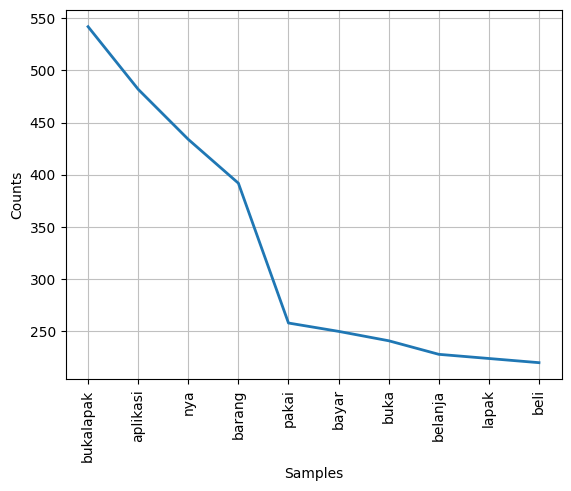

In [49]:
import matplotlib.pyplot as plt

# plotting
fqdist.plot(10,cumulative=False)
plt.show()

In [50]:
label = []
for index, row in name_dataframe.iterrows():
    if row["Rating"] == 5 or row["Rating"] == 4:
        label.append(1)
    else:
        label.append(0)

name_dataframe["label"] = label

name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga...","[paylater, batal, otomatis, kadang, nya, ganti...",paylater batal otomatis kadang nya ganti jatuh...,0
1,dedy kelana (CV PRIBUMI BANGKIT),1,2023-03-25 10:26:56,pastinya bukan hp dan wifi saya yang lemmooott...,"[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, hp, wifi, lemmooottttt, dasarnya, b...","[pasti, hp, wifi, lemmooottttt, dasar, bukalap...",pasti hp wifi lemmooottttt dasar bukalapak kar...,0
2,Rika Riyanti,5,2023-04-11 13:30:31,sangat membantu sekali bukalapak tapi sudah sa...,"[sangat, membantu, sekali, bukalapak, tapi, su...","[sangat, membantu, sekali, bukalapak, tapi, su...","[membantu, bukalapak, pelanggan, paylater, pem...","[bantu, bukalapak, langgan, paylater, bayar, l...",bantu bukalapak langgan paylater bayar limit t...,1
3,Afifur Rohman,1,2023-04-26 08:16:00,sebenarnya aplikasi ini cukup bagus cuma ada b...,"[sebenarnya, aplikasi, ini, cukup, bagus, cuma...","[sebenarnya, aplikasi, ini, cukup, bagus, cuma...","[aplikasi, bagus, minusnya, ongkir, mahal, vou...","[aplikasi, bagus, minus, ongkir, mahal, vouche...",aplikasi bagus minus ongkir mahal voucher paka...,0
4,Yuni Artha,1,2023-04-13 19:30:16,bukalapak semakin parah pesanan tgl april di...,"[bukalapak, semakin, parah, pesanan, tgl, apri...","[bukalapak, semakin, parah, pesanan, tanggal, ...","[bukalapak, parah, pesanan, tanggal, april, di...","[bukalapak, parah, pesan, tanggal, april, kiri...",bukalapak parah pesan tanggal april kirim lapa...,0
...,...,...,...,...,...,...,...,...,...,...
1295,Pengguna Google,1,2019-05-12 10:33:31,satu dulu ya bintangnya nanti kalo sdh normal ...,"[satu, dulu, ya, bintangnya, nanti, kalo, sdh,...","[satu, dulu, ya, bintangnya, nanti, kalo, suda...","[ya, bintangnya, kalo, normal, app, blnya, dit...","[ya, bintang, kalo, normal, app, blnya, tambah...",ya bintang kalo normal app blnya tambah bintan...,0
1296,Rinto Martadi,1,2023-02-02 10:16:53,berhenti lah belanja di bukalapak makin banyak...,"[berhenti, lah, belanja, di, bukalapak, makin,...","[berhenti, lah, belanja, di, bukalapak, makin,...","[berhenti, belanja, bukalapak, pelapak, amanah...","[henti, belanja, bukalapak, lapak, amanah, ref...",henti belanja bukalapak lapak amanah refund as...,0
1297,nursito gendut,5,2022-12-08 13:00:45,saya sdh dari dulu pakai aplikasi buka lapak d...,"[saya, sdh, dari, dulu, pakai, aplikasi, buka,...","[saya, sudah, dari, dulu, pakai, aplikasi, buk...","[pakai, aplikasi, buka, lapak, puas, layananny...","[pakai, aplikasi, buka, lapak, puas, layan, ti...",pakai aplikasi buka lapak puas layan tingkat b...,1
1298,agus rianto,5,2023-04-14 02:13:14,sangat mudah bertransaksi,"[sangat, mudah, bertransaksi]","[sangat, mudah, bertransaksi]","[mudah, bertransaksi]","[mudah, transaksi]",mudah transaksi,1


In [51]:
#create a user define function to find out polarity & subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#creating another user define function to label the sentiment 

def getSentiment(value):
    if value<0:
        return 'Negative'
    elif value==0:
        return 'Neutral'
    else:
        return 'Positive'

In [52]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga...","[paylater, batal, otomatis, kadang, nya, ganti...",paylater batal otomatis kadang nya ganti jatuh...,0
1,dedy kelana (CV PRIBUMI BANGKIT),1,2023-03-25 10:26:56,pastinya bukan hp dan wifi saya yang lemmooott...,"[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, hp, wifi, lemmooottttt, dasarnya, b...","[pasti, hp, wifi, lemmooottttt, dasar, bukalap...",pasti hp wifi lemmooottttt dasar bukalapak kar...,0
2,Rika Riyanti,5,2023-04-11 13:30:31,sangat membantu sekali bukalapak tapi sudah sa...,"[sangat, membantu, sekali, bukalapak, tapi, su...","[sangat, membantu, sekali, bukalapak, tapi, su...","[membantu, bukalapak, pelanggan, paylater, pem...","[bantu, bukalapak, langgan, paylater, bayar, l...",bantu bukalapak langgan paylater bayar limit t...,1
3,Afifur Rohman,1,2023-04-26 08:16:00,sebenarnya aplikasi ini cukup bagus cuma ada b...,"[sebenarnya, aplikasi, ini, cukup, bagus, cuma...","[sebenarnya, aplikasi, ini, cukup, bagus, cuma...","[aplikasi, bagus, minusnya, ongkir, mahal, vou...","[aplikasi, bagus, minus, ongkir, mahal, vouche...",aplikasi bagus minus ongkir mahal voucher paka...,0
4,Yuni Artha,1,2023-04-13 19:30:16,bukalapak semakin parah pesanan tgl april di...,"[bukalapak, semakin, parah, pesanan, tgl, apri...","[bukalapak, semakin, parah, pesanan, tanggal, ...","[bukalapak, parah, pesanan, tanggal, april, di...","[bukalapak, parah, pesan, tanggal, april, kiri...",bukalapak parah pesan tanggal april kirim lapa...,0


In [53]:
from textblob import TextBlob


In [54]:
def run_vader(name_dataframe):
    # Generate VADER sentiment analyzer object
    sid = SentimentIntensityAnalyzer()

In [55]:
name_dataframe['Polarity']=name_dataframe['Ulasan_clean'].apply(getPolarity)
name_dataframe['Subjectivity']=name_dataframe['Ulasan_clean'].apply(getSubjectivity)
name_dataframe['Sentiment']=name_dataframe['Polarity'].apply(getSentiment)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga...","[paylater, batal, otomatis, kadang, nya, ganti...",paylater batal otomatis kadang nya ganti jatuh...,0,0.000000,0.000000,Neutral
1,dedy kelana (CV PRIBUMI BANGKIT),1,2023-03-25 10:26:56,pastinya bukan hp dan wifi saya yang lemmooott...,"[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, hp, wifi, lemmooottttt, dasarnya, b...","[pasti, hp, wifi, lemmooottttt, dasar, bukalap...",pasti hp wifi lemmooottttt dasar bukalapak kar...,0,0.166667,0.333333,Positive
2,Rika Riyanti,5,2023-04-11 13:30:31,sangat membantu sekali bukalapak tapi sudah sa...,"[sangat, membantu, sekali, bukalapak, tapi, su...","[sangat, membantu, sekali, bukalapak, tapi, su...","[membantu, bukalapak, pelanggan, paylater, pem...","[bantu, bukalapak, langgan, paylater, bayar, l...",bantu bukalapak langgan paylater bayar limit t...,1,0.000000,0.000000,Neutral
3,Afifur Rohman,1,2023-04-26 08:16:00,sebenarnya aplikasi ini cukup bagus cuma ada b...,"[sebenarnya, aplikasi, ini, cukup, bagus, cuma...","[sebenarnya, aplikasi, ini, cukup, bagus, cuma...","[aplikasi, bagus, minusnya, ongkir, mahal, vou...","[aplikasi, bagus, minus, ongkir, mahal, vouche...",aplikasi bagus minus ongkir mahal voucher paka...,0,-0.100000,0.100000,Negative
4,Yuni Artha,1,2023-04-13 19:30:16,bukalapak semakin parah pesanan tgl april di...,"[bukalapak, semakin, parah, pesanan, tgl, apri...","[bukalapak, semakin, parah, pesanan, tanggal, ...","[bukalapak, parah, pesanan, tanggal, april, di...","[bukalapak, parah, pesan, tanggal, april, kiri...",bukalapak parah pesan tanggal april kirim lapa...,0,0.000000,0.000000,Neutral


In [114]:
name_dataframe['month'] = name_dataframe['Date'].dt.month

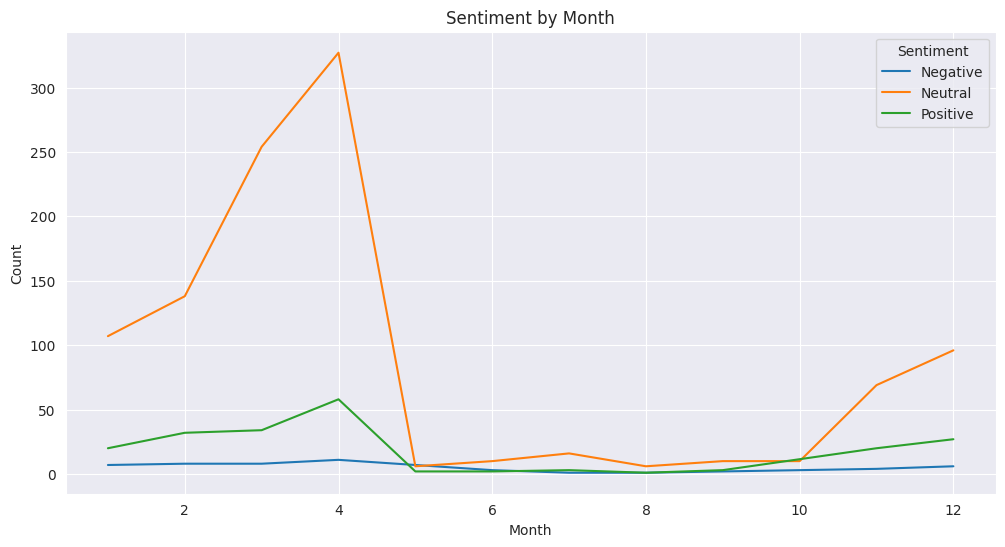

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by month and sentiment
sentiment_df = name_dataframe.groupby(['month', 'Sentiment']).size().reset_index(name='Count')


# Plot the sentiment counts by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Count', hue='Sentiment', data=sentiment_df)
plt.title('Sentiment by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


In [57]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga...","[paylater, batal, otomatis, kadang, nya, ganti...",paylater batal otomatis kadang nya ganti jatuh...,0,0.000000,0.000000,Neutral
1,dedy kelana (CV PRIBUMI BANGKIT),1,2023-03-25 10:26:56,pastinya bukan hp dan wifi saya yang lemmooott...,"[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, bukan, hp, dan, wifi, saya, yang, l...","[pastinya, hp, wifi, lemmooottttt, dasarnya, b...","[pasti, hp, wifi, lemmooottttt, dasar, bukalap...",pasti hp wifi lemmooottttt dasar bukalapak kar...,0,0.166667,0.333333,Positive
2,Rika Riyanti,5,2023-04-11 13:30:31,sangat membantu sekali bukalapak tapi sudah sa...,"[sangat, membantu, sekali, bukalapak, tapi, su...","[sangat, membantu, sekali, bukalapak, tapi, su...","[membantu, bukalapak, pelanggan, paylater, pem...","[bantu, bukalapak, langgan, paylater, bayar, l...",bantu bukalapak langgan paylater bayar limit t...,1,0.000000,0.000000,Neutral
3,Afifur Rohman,1,2023-04-26 08:16:00,sebenarnya aplikasi ini cukup bagus cuma ada b...,"[sebenarnya, aplikasi, ini, cukup, bagus, cuma...","[sebenarnya, aplikasi, ini, cukup, bagus, cuma...","[aplikasi, bagus, minusnya, ongkir, mahal, vou...","[aplikasi, bagus, minus, ongkir, mahal, vouche...",aplikasi bagus minus ongkir mahal voucher paka...,0,-0.100000,0.100000,Negative
4,Yuni Artha,1,2023-04-13 19:30:16,bukalapak semakin parah pesanan tgl april di...,"[bukalapak, semakin, parah, pesanan, tgl, apri...","[bukalapak, semakin, parah, pesanan, tanggal, ...","[bukalapak, parah, pesanan, tanggal, april, di...","[bukalapak, parah, pesan, tanggal, april, kiri...",bukalapak parah pesan tanggal april kirim lapa...,0,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Pengguna Google,1,2019-05-12 10:33:31,satu dulu ya bintangnya nanti kalo sdh normal ...,"[satu, dulu, ya, bintangnya, nanti, kalo, sdh,...","[satu, dulu, ya, bintangnya, nanti, kalo, suda...","[ya, bintangnya, kalo, normal, app, blnya, dit...","[ya, bintang, kalo, normal, app, blnya, tambah...",ya bintang kalo normal app blnya tambah bintan...,0,0.150000,0.650000,Positive
1296,Rinto Martadi,1,2023-02-02 10:16:53,berhenti lah belanja di bukalapak makin banyak...,"[berhenti, lah, belanja, di, bukalapak, makin,...","[berhenti, lah, belanja, di, bukalapak, makin,...","[berhenti, belanja, bukalapak, pelapak, amanah...","[henti, belanja, bukalapak, lapak, amanah, ref...",henti belanja bukalapak lapak amanah refund as...,0,0.000000,0.000000,Neutral
1297,nursito gendut,5,2022-12-08 13:00:45,saya sdh dari dulu pakai aplikasi buka lapak d...,"[saya, sdh, dari, dulu, pakai, aplikasi, buka,...","[saya, sudah, dari, dulu, pakai, aplikasi, buk...","[pakai, aplikasi, buka, lapak, puas, layananny...","[pakai, aplikasi, buka, lapak, puas, layan, ti...",pakai aplikasi buka lapak puas layan tingkat b...,1,0.000000,0.000000,Neutral
1298,agus rianto,5,2023-04-14 02:13:14,sangat mudah bertransaksi,"[sangat, mudah, bertransaksi]","[sangat, mudah, bertransaksi]","[mudah, bertransaksi]","[mudah, transaksi]",mudah transaksi,1,0.000000,0.000000,Neutral


In [58]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
name_dataframe.head()

Positive words


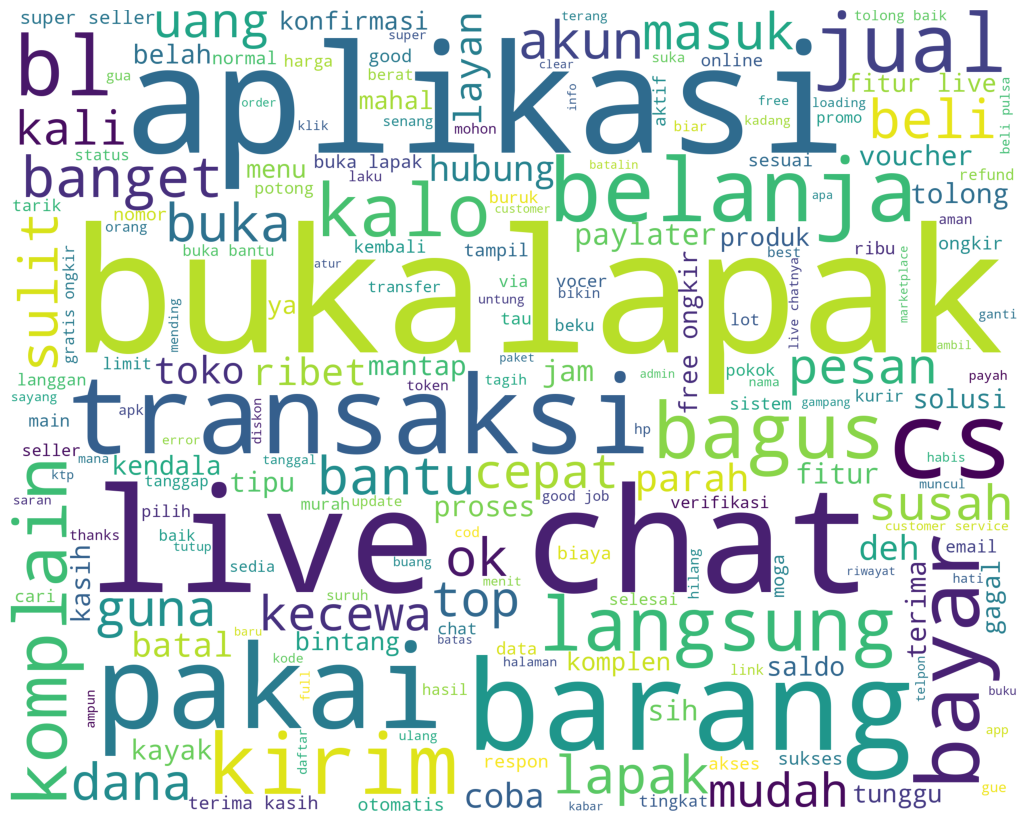

Negative words


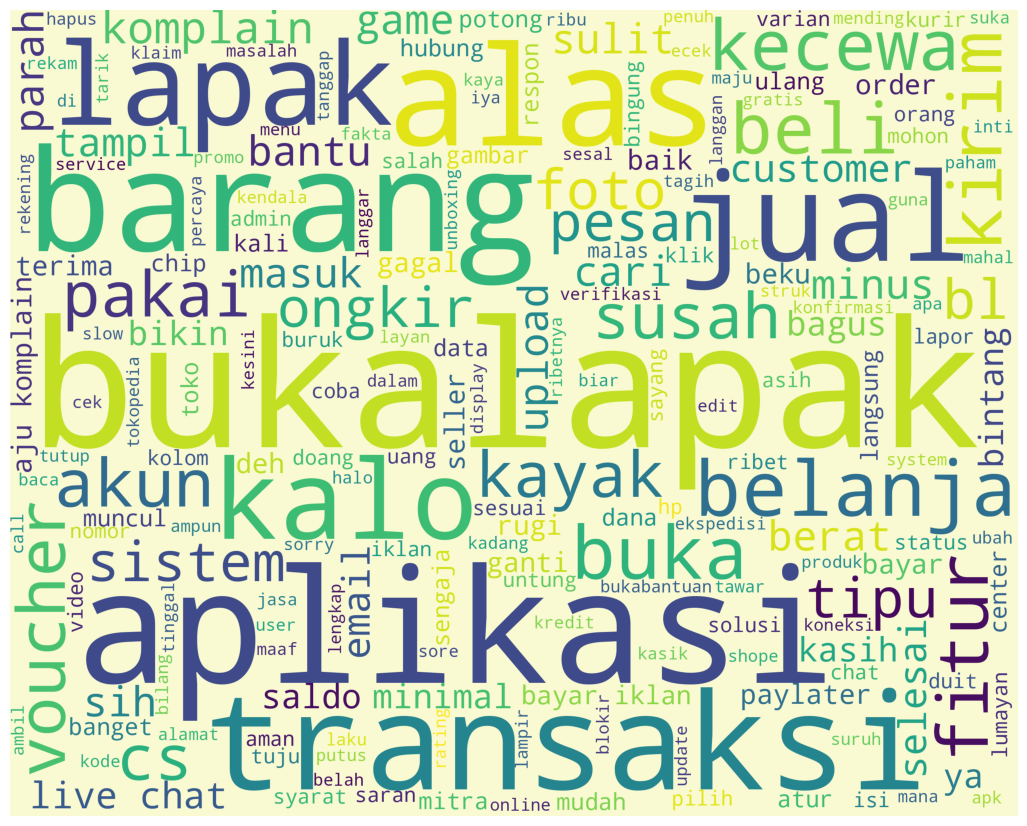

Neutral words


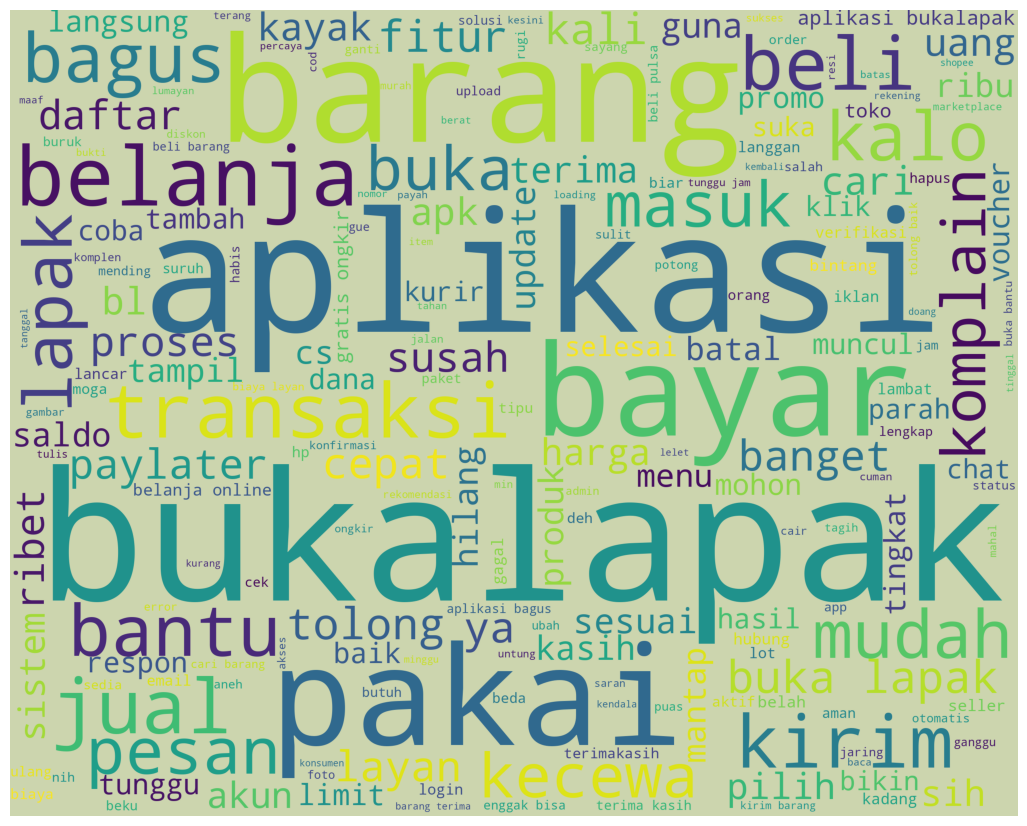

In [59]:
train_pos = name_dataframe[ name_dataframe['Sentiment'] == 'Positive']
train_pos = train_pos['Ulasan_clean']
train_neg = name_dataframe[ name_dataframe['Sentiment'] == 'Negative']
train_neg = train_neg['Ulasan_clean']
train_net = name_dataframe[ name_dataframe['Sentiment'] == 'Neutral']
train_net = train_net['Ulasan_clean']

def wordcloud_draw(data, color = '#FAFAD2'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and not word.startswith('nya')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)
print("Neutral words")
wordcloud_draw(train_net,'#ccd5ae')

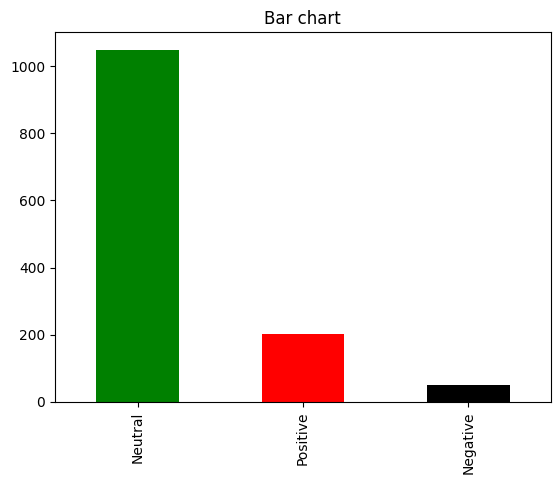

In [60]:
sentimen_data=pd.value_counts(name_dataframe["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red", "black"])
plt.title('Bar chart')
plt.show()

In [61]:
name_dataframe["Sentiment"].value_counts()

Neutral     1049
Positive     202
Negative      49
Name: Sentiment, dtype: int64

In [62]:
name_dataframe["Sentiment"].value_counts()

Neutral     1049
Positive     202
Negative      49
Name: Sentiment, dtype: int64

In [63]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [64]:
Ulasan = name_dataframe['Ulasan_clean']

In [65]:
Ulasan.isnull().sum()

0

In [66]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

3671


In [67]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata 

{'paylater': 2463,
 'batal': 320,
 'otomatis': 2392,
 'kadang': 1455,
 'nya': 2301,
 'ganti': 1144,
 'jatuh': 1395,
 'tempo': 3300,
 'bayar': 332,
 'biaya': 451,
 'lambat': 1780,
 'layan': 1821,
 'biar': 449,
 'rasa': 2726,
 'sistem': 3106,
 'enak': 1036,
 'chat': 717,
 'susah': 3210,
 'error': 1052,
 'salah': 2863,
 'bikin': 457,
 'pusing': 2704,
 'pasti': 2454,
 'hp': 1281,
 'wifi': 3629,
 'lemmooottttt': 1838,
 'dasar': 823,
 'bukalapak': 570,
 'karuan': 1488,
 'lihat': 1874,
 'status': 3172,
 'transsaksi': 3446,
 'tunggu': 3485,
 'halaman': 1222,
 'isi': 1359,
 'penuh': 2546,
 'muncul': 2168,
 'tawar': 3274,
 'tanda': 3244,
 'sulit': 3199,
 'baca': 224,
 'pencet': 2526,
 'bulalapak': 625,
 'main': 1943,
 'paket': 2427,
 'data': 825,
 'orang': 2381,
 'konten': 1669,
 'webnya': 3623,
 'lumayan': 1923,
 'hasil': 1246,
 'moga': 2144,
 'curiga': 787,
 'maaf': 1932,
 'bantu': 286,
 'langgan': 1792,
 'limit': 1876,
 'tambah': 3240,
 'profesional': 2663,
 'maju': 1944,
 'aplikasi': 178,
 '

In [68]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 320)	1
  (0, 332)	1
  (0, 449)	1
  (0, 451)	2
  (0, 457)	1
  (0, 717)	1
  (0, 1036)	1
  (0, 1052)	1
  (0, 1144)	2
  (0, 1395)	1
  (0, 1455)	2
  (0, 1780)	1
  (0, 1821)	2
  (0, 2301)	3
  (0, 2392)	1
  (0, 2463)	1
  (0, 2704)	2
  (0, 2726)	2
  (0, 2863)	1
  (0, 3106)	1
  (0, 3210)	1
  (0, 3300)	1
  (1, 224)	1
  (1, 570)	1
  (1, 625)	1
  :	:
  (1297, 449)	1
  (1297, 559)	1
  (1297, 1199)	1
  (1297, 1800)	1
  (1297, 1821)	1
  (1297, 2420)	1
  (1297, 2688)	1
  (1297, 3384)	1
  (1298, 2154)	1
  (1298, 3436)	1
  (1299, 178)	1
  (1299, 234)	1
  (1299, 298)	3
  (1299, 559)	1
  (1299, 670)	1
  (1299, 1084)	1
  (1299, 1800)	1
  (1299, 1951)	1
  (1299, 2012)	1
  (1299, 2212)	1
  (1299, 2254)	1
  (1299, 2301)	2
  (1299, 3307)	1
  (1299, 3418)	1
  (1299, 3528)	1


In [69]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

pasti hp wifi lemmooottttt dasar bukalapak karuan lihat status transsaksi tunggu halaman isi penuh muncul tawar kadang tanda nya sulit baca pencet bulalapak main paket data orang konten webnya lumayan hasil moga curiga maaf


In [70]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 224)	1
  (0, 570)	1
  (0, 625)	1
  (0, 787)	1
  (0, 823)	1
  (0, 825)	1
  (0, 1222)	1
  (0, 1246)	1
  (0, 1281)	1
  (0, 1359)	1
  (0, 1455)	1
  (0, 1488)	1
  (0, 1669)	1
  (0, 1838)	1
  (0, 1874)	1
  (0, 1923)	1
  (0, 1932)	1
  (0, 1943)	1
  (0, 2144)	1
  (0, 2168)	1
  (0, 2301)	1
  (0, 2381)	1
  (0, 2427)	1
  (0, 2454)	1
  (0, 2526)	1
  (0, 2546)	1
  (0, 3172)	1
  (0, 3199)	1
  (0, 3244)	1
  (0, 3274)	1
  (0, 3446)	1
  (0, 3485)	1
  (0, 3623)	1
  (0, 3629)	1


In [71]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[6.78459412 6.78459412 7.4777413  ... 7.4777413  7.4777413  7.4777413 ]
  (0, 3629)	0.1864703905254794
  (0, 3623)	0.22890740977261875
  (0, 3485)	0.12095903051599532
  (0, 3446)	0.2164953773216395
  (0, 3274)	0.1864703905254794
  (0, 3244)	0.20085806576958412
  (0, 3199)	0.13359698162048633
  (0, 3172)	0.13099014453527852
  (0, 2546)	0.1828648352470906
  (0, 2526)	0.20085806576958412
  (0, 2454)	0.20085806576958412
  (0, 2427)	0.14812101271859412
  (0, 2381)	0.14129017833912916
  (0, 2301)	0.07552265082129159
  (0, 2168)	0.13498866847850502
  (0, 2144)	0.1285879841079976
  (0, 1943)	0.1828648352470906
  (0, 1932)	0.15692748989118455
  (0, 1923)	0.15550342668048206
  (0, 1874)	0.1716081036253722
  (0, 1838)	0.22890740977261875
  (0, 1669)	0.2164953773216395
  (0, 1488)	0.2076889001490491
  (0, 1455)	0.14500525730719113
  (0, 1359)	0.16164632562352094
  (0, 1281)	0.13428491705691237
  (0, 1246)	0.1379775615508233
  (0, 1222)	0.16164632562352094
  (0, 825)	0.15414267649877902
  (0, 823)	

In [72]:
data_label = name_dataframe[["Nama pengguna", "Ulasan_clean", "Sentiment"]]

In [73]:
data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-73-5732072d6cca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")


In [74]:
data_label.to_excel("data_label.xlsx")

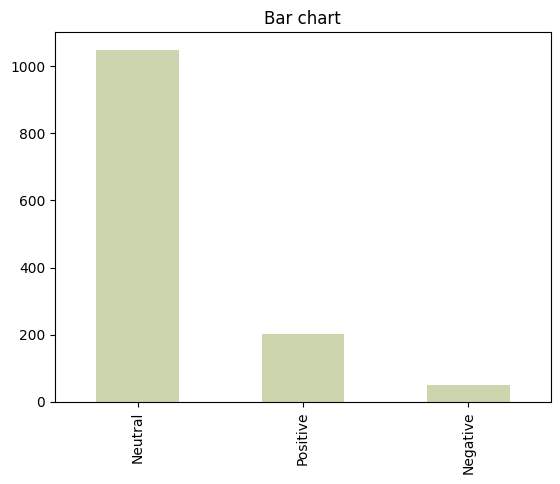

In [75]:
sentimen_data=pd.value_counts(data_label["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["#ccd5ae"])
plt.title('Bar chart')
plt.show()

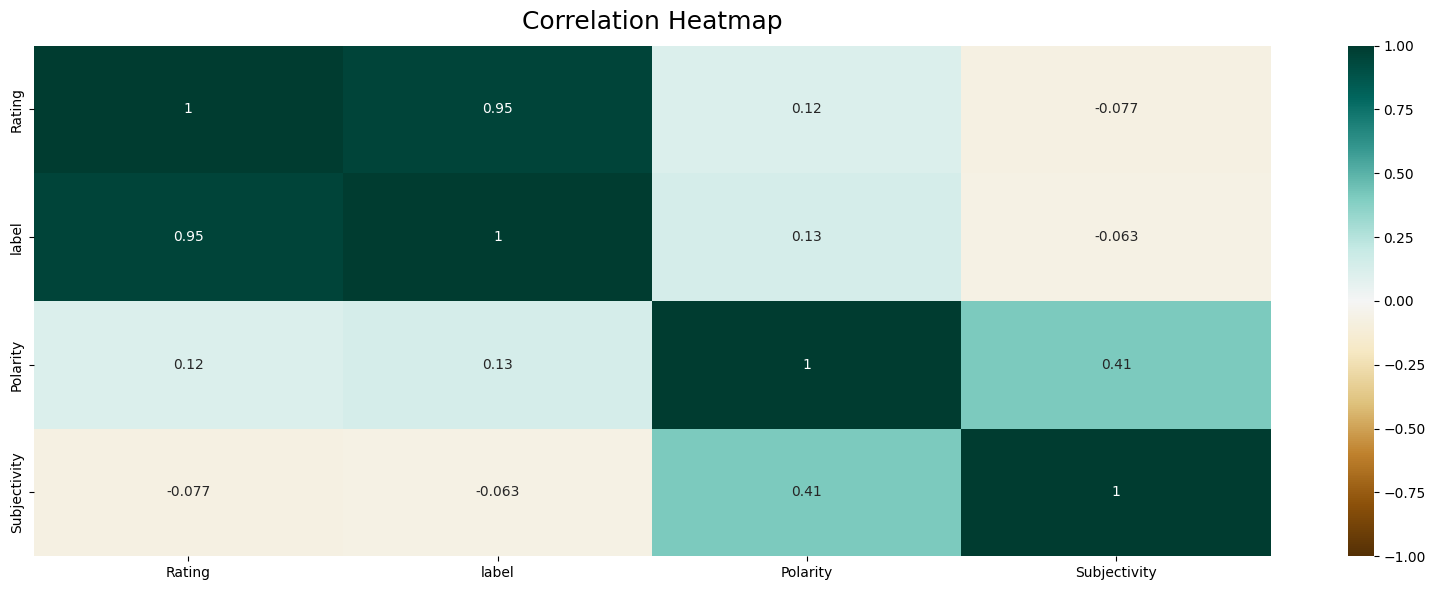

In [76]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(name_dataframe.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()

In [77]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'Ulasan_normalized', 'Ulasan_stop_removed', 'Ulasan_Stemmed',
       'Ulasan_clean', 'label', 'Polarity', 'Subjectivity', 'Sentiment'],
      dtype='object')

In [78]:
from wordcloud import WordCloud

In [82]:
train_s0 = data_label[data_label["Sentiment"] == 'Negative']

In [83]:
train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-83-4a391e85ccb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")


In [84]:
train_s0

,Nama pengguna,Ulasan_clean,Sentiment
3,Afifur Rohman,aplikasi bagus minus ongkir mahal voucher paka...,Negative
5,Kaloka Galih Kayu Wangi,jual emas bukaemas susah banget banget problem...,Negative
13,Bam Hendrian,kesini sistem nya berat ajabanyak sisrem gunab...,Negative
40,eH boy,developer bukalapak lihat aplikasi shopee laza...,Negative
62,Lemuel,mohon maaf kasih bintang alas hubung cs via ch...,Negative
63,Sutris Trisno,guna setia bltp perlahan alih toko online lain...,Negative
86,Kamal Yusup,down lapor pesan cocok pesan terima lapor pesa...,Negative
115,inaya putry26,aplikasi nya visa live chat maju bukalapak pes...,Negative
289,tri mulyanto,kecewa kali belanja lapak merespon pesan batas...,Negative
290,Achenk Chonsleth,lumayan bagus minus sedia menu layan varian pr...,Negative


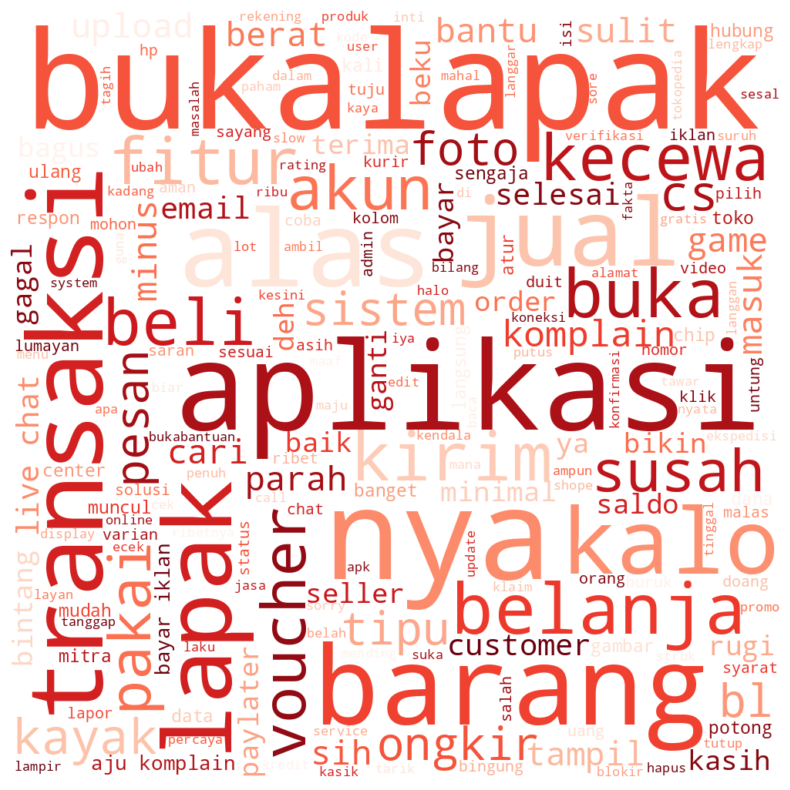

In [85]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan_clean"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

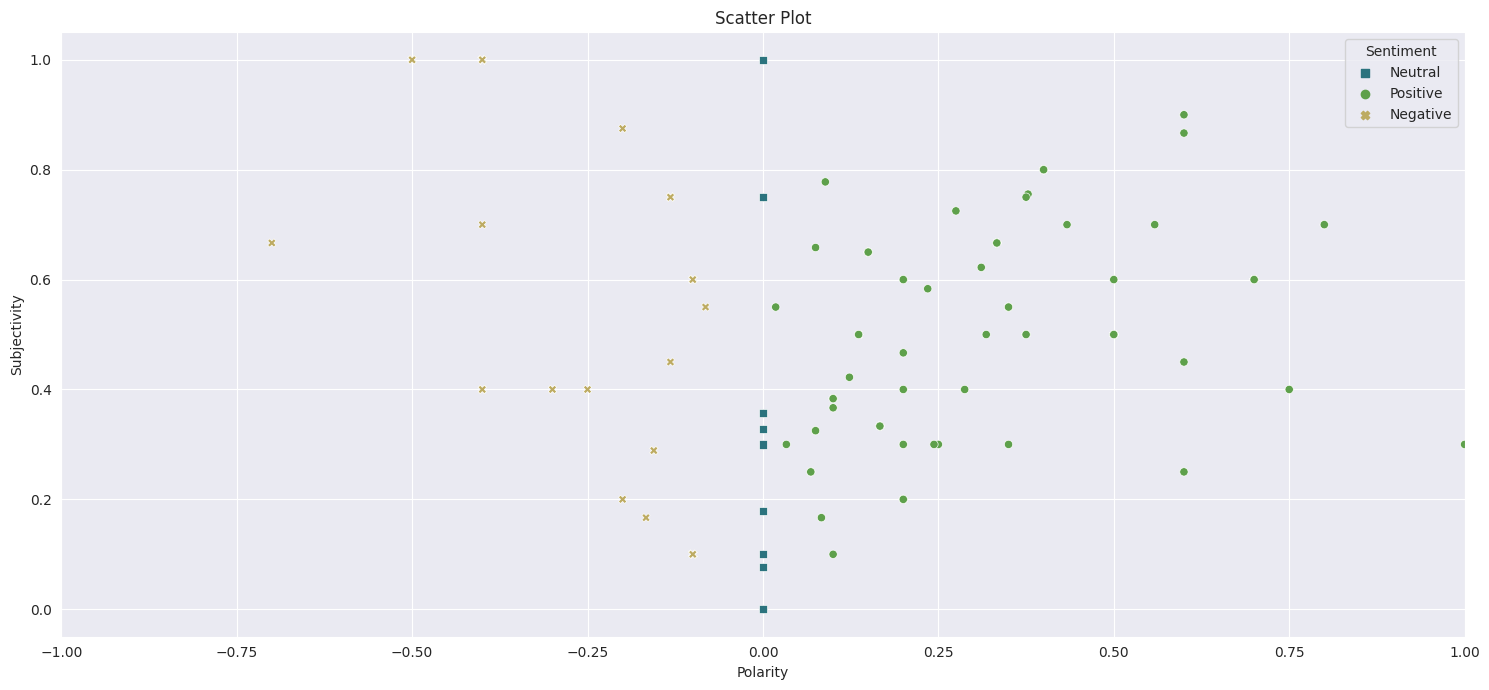

In [86]:
# Create scatter plot
sns.set_style('darkgrid')
plt.figure(figsize = (15,7))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=name_dataframe, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

In [87]:
train_s1 = data_label[data_label["Sentiment"] == 'Positive']

In [88]:
train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-88-89653e0cae75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")


In [89]:
train_s1

,Nama pengguna,Ulasan_clean,Sentiment
1,dedy kelana (CV PRIBUMI BANGKIT),pasti hp wifi lemmooottttt dasar bukalapak kar...,Positive
6,Kosim Nurseha,solusi bukabantuan live chat bantu tunggu jam ...,Positive
7,Bayazid_Boy,bl kepercayan ecom utama transaksi aktifasi ga...,Positive
18,Arif Zulkarnaen,apk sulit komplain kendala live chat cs nya mi...,Positive
24,Ratna Dewi,payah ah kecewa saldo habis untung ngisi nya c...,Positive
...,...,...,...
1252,Phai Muhammad,aplikasi jual tipu belanja bukalapak gue pesan...,Positive
1261,Iwan Setiono,ok kirim cepat toko sebelahharga murah toko be...,Positive
1268,Mizannudin Hardiyansyah,aplikasi belanja buruk cs nya pakai robot chat...,Positive
1292,Eko Yudhi,suka banget bukalapak manja belanja online mud...,Positive


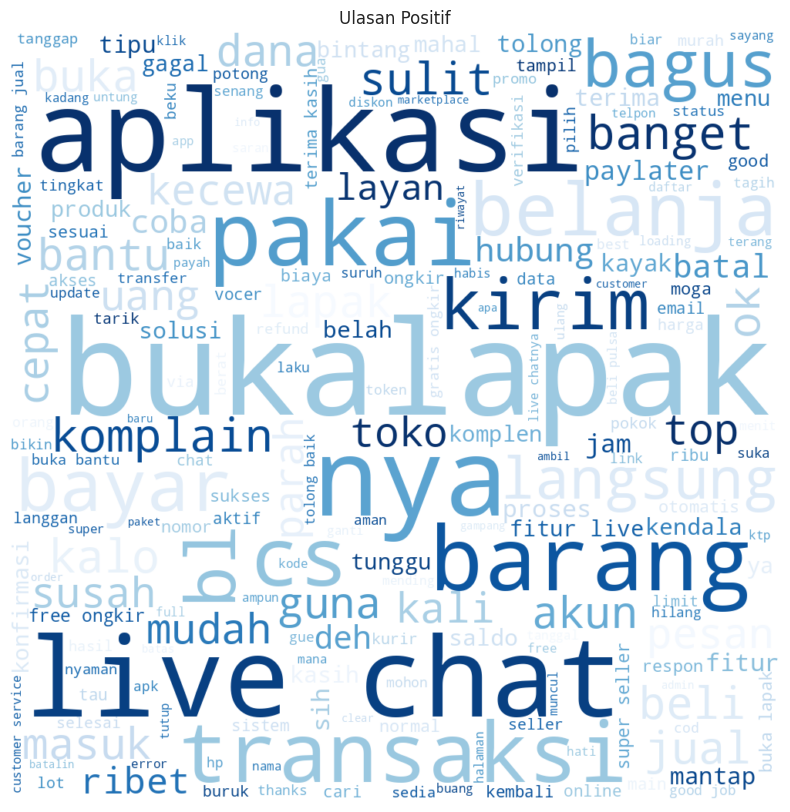

In [90]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan_clean"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

In [91]:
data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")

<ipython-input-91-27b828896519>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")


In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_clean'], data_label['Sentiment'], 
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

In [93]:
import numpy as np

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer             #menghitung n menjumlah kan dan menjumlah kan tf and n berdasarkan seluruh dokumen 
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [95]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1170, 3365)
(130, 3365)


NameError: ignored

**sample random**

mengambil secara acak dari daftar sample atau sampling frame yang tersedia setiap individu memiliki peluang yang sama untuk terpilih
peluang tersebut ada melakukan peluang sama ketika mempunyai data besar akan memliki peluang lebih besar untuk terpilih tetapi sebaliknya ketika mempunyai data dikit dapat peluang lebih sedikit

In [100]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_clean'], data_label['Sentiment'], 
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

# Vectorize the text data
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create the Naive Bayes Classifier object
gnb = GaussianNB()

# Perform cross-validation
scores = cross_val_score(gnb, X_train.toarray(), y_train, cv=5)

# Print the cross-validation scores
print('Cross-validation scores:', scores)

# Fit the classifier to the training data
gnb.fit(X_train.toarray(), y_train)

# Predict the sentiment of the test data
y_pred = gnb.predict(X_test.toarray())

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Cross-validation scores: [0.56837607 0.5982906  0.60683761 0.5982906  0.55128205]
Confusion Matrix:
 [[ 0  4  1]
 [10 66 29]
 [ 1 14  5]]


In [106]:

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8250


In [105]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [107]:
# print classification error kesalahan klasifikasi 

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1750


In [109]:

y_pred_prob_df = pd.DataFrame(data=y_pred, columns=['Positif', 'Neutral', 'Negatif'])

y_pred_prob_df

ValueError: ignored

In [112]:
y_pred = gnb.predict(X_test)

y_pred

TypeError: ignored

In [113]:
X_test = pd.DataFrame(X_test, columns=[cols])

NameError: ignored

In [101]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred))

--------------------- confusion matrix  ----------------------------
[[ 0  4  1]
 [10 66 29]
 [ 1 14  5]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         5
     Neutral       0.79      0.63      0.70       105
    Positive       0.14      0.25      0.18        20

    accuracy                           0.55       130
   macro avg       0.31      0.29      0.29       130
weighted avg       0.66      0.55      0.59       130



In [102]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Negative:1', 'Neutral:0', 'Positive:2'], 
                                 index=['Negative:1', 'Neutral:0', 'Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
X_train = X_train.toarray()

In [ ]:
X_test = X_test.toarray()

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [99]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#deklarasi metode cross validation
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
#tuning hyperparameter menggunakan gridsearch

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gscv_nb = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 

#Fitting ke Model
gscv_nb.fit(X_train,y_train)
#mendapatkan hyperparameters terbaik
gscv_nb.best_params_

NameError: ignored

In [ ]:
nb = GaussianNB(var_smoothing=1.0) # untuk tidak overviting

In [ ]:
nb.fit(X_train, y_train)

In [ ]:
y_pred_nb = nb.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print(y_train)

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Negative:1', 'Neutral:0', 'Positive:2'], 
                                 index=['Negative:1', 'Neutral:0', 'Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:

print('Confusion matrix\n\n', cm)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Regresi Logistik
logreg = LogisticRegression()
# SVM
svm = SVC(probability=True)

In [ ]:
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)


In [ ]:
y_pred1_logreg = logreg.predict(X_test)
y_pred1_svm = svm.predict(X_test)

In [ ]:
print('---------------  Regresi Logistik  -------------------')
print(classification_report(y_test, y_pred1_logreg))
print('--------------------- SVM ----------------------------')
print(classification_report(y_test, y_pred1_svm))